In [ ]:
#!pip install pysam matplotlib

In [5]:
import pysam
import collections
import matplotlib.pyplot as plt

In [12]:
bam = "/Users/lchen/current_projects/concall-working/results/circular/DER5088_double.tagged.sorted.bam"
bamfile = pysam.AlignmentFile(bam, "rb" )


In [18]:
for read in bamfile:
    if read.is_reverse:
        print(read.qname)
        break

e03bd241-5c6e-4c00-9328-54c2688a3be1


In [39]:
read.get_forward_sequence()[0:5]


'AGATT'

In [21]:
rev3 = collections.Counter()

In [22]:
rev3

Counter()

In [32]:
dictionary_1 = collections.defaultdict()

In [36]:
dictionary_1['class'] =[1,2,3]

In [37]:
dictionary_1

defaultdict(None, {'Numbers': 'hey', 'names': 'inez', 'class': [1, 2, 3]})

In [6]:
def get_motif(bam, last_n, subsample = False):
    
    rev3 = collections.Counter()
    rev5 = collections.Counter()
    fwd3= collections.Counter()
    fwd5= collections.Counter()
    samfile = pysam.AlignmentFile(bam, "rb" )
    i = 0
    for read in samfile:
    #     print(read)
        # always from outer to inter
        if read.is_reverse:
            rev5[read.get_forward_sequence()[0:last_n]] +=1 
            n =len(read.get_forward_sequence())-last_n
            se = read.get_forward_sequence()[:n-1:-1]
            rev3[se] +=1
        else:
            fwd5[read.get_forward_sequence()[0:last_n]] +=1 
            # from 5' to 3' direction
            n =len(read.get_forward_sequence())-last_n
            se = read.get_forward_sequence()[:n-1:-1]
            fwd3[se] +=1
        i += 1
        if subsample:
            if i > subsample:
                break
    motif = {"rev3":rev3, "rev5":rev5, "fwd3":fwd3,"fwd5":fwd5}
    return motif


In [7]:
def plot_kmer_dist(motifs, ind, colors=['blue', "red", "teal", "yellow"], relative = True, figsize = (10,4)):
    plt.figure(figsize=figsize)
    for i, x in enumerate(motifs):
        if relative:
            sum_total = sum(x.values())
        else:
            sum_total = 1
        # x labels should be predefined. (combination of ATGC sorted with alphabetical orders.)
        plt.bar([k for k,v in  sorted(x.items())],[v/sum_total for k,v in  sorted(x.items())], 
                label = f"{ind[i]}", 
                alpha=0.3, 
                color = colors[i]) 
    plt.xticks( rotation='vertical')
    plt.legend()
    plt.show()


In [8]:
def plot_all(df, figsize= (10,4)):    
    plot_kmer_dist([df['fwd5'],df['rev5']],["fwd 5 prime end", "rev 5 prime end"], [ "red", "yellow"], figsize= figsize)
    plot_kmer_dist([df['fwd3'],df['rev3']],["fwd 3 prime end", "rev 3 prime end"], [ "blue", "teal"], figsize= figsize)
    plot_kmer_dist([df['fwd5'],df['fwd3']],["fwd 5 prime end", "fwd 3' prime end"], [ "red", "blue"], figsize= figsize)
    plot_kmer_dist([df['rev5'],df['rev3']],
                   ["rev 5 prime end", "rev 3' prime end"], [ "teal", "yellow"], figsize= figsize)


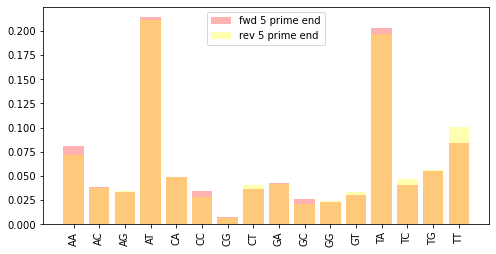

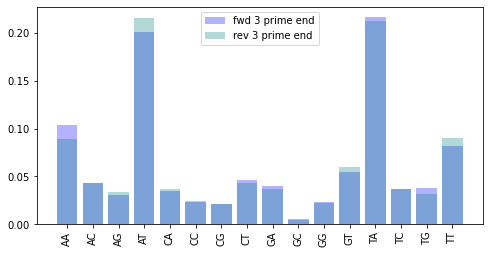

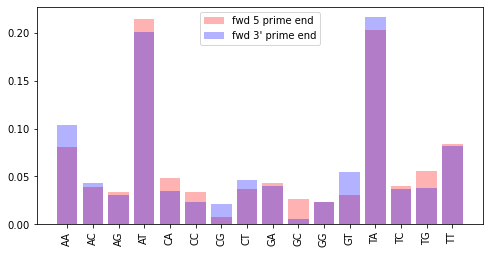

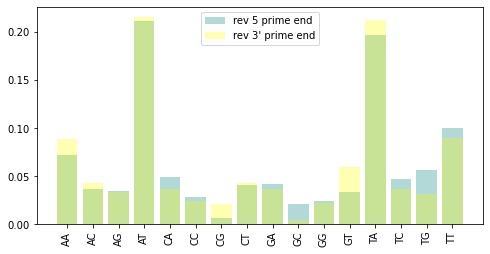

In [9]:
bam = "/Users/lchen/current_projects/concall-working/results/circular/DER5088_double.tagged.sorted.bam"
DER5088_2mer  = get_motif(bam, 2)
plot_all(DER5088_2mer, figsize = (8,4))

In [ ]:
# 1. comment the code
# 2. generate random cfDNA
   # - 50 bp  of random sequneces of 10,000,000 reads.
   #  random generation of cfDNA length of normal distribution around 167bp, from the genome. (not for today) 
# 3. reverse complement : make reverse strand to foward strand. 
